In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

### 4.2 Linear data: One-parameter model

In [2]:
# Define explicit data
data_x = torch.tensor([1.0, 2.0, 3.0, 4.0], dtype=torch.float32)
data_y = torch.tensor([-0.5, 0.5, 1.5, 2.5], dtype=torch.float32)

# Define model
class LinearModelWithoutBias(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Single linear layer with no bias to learn only the slope
        self.layer = torch.nn.Linear(1, 1, bias=False)

    def forward(self, x):
        x = x.view(-1, 1)
        return self.layer(x).flatten()

# Instantiate model
model = LinearModelWithoutBias()

# Define loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(data_x)
    loss = loss_fn(y_pred, data_y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Output the learned parameter w
w = model.layer.weight.item()
print(f'Learned parameter w: {w}')

Epoch [100/1000], Loss: 0.3750
Epoch [200/1000], Loss: 0.3750
Epoch [300/1000], Loss: 0.3750
Epoch [400/1000], Loss: 0.3750
Epoch [500/1000], Loss: 0.3750
Epoch [600/1000], Loss: 0.3750
Epoch [700/1000], Loss: 0.3750
Epoch [800/1000], Loss: 0.3750
Epoch [900/1000], Loss: 0.3750
Epoch [1000/1000], Loss: 0.3750
Learned parameter w: 0.5


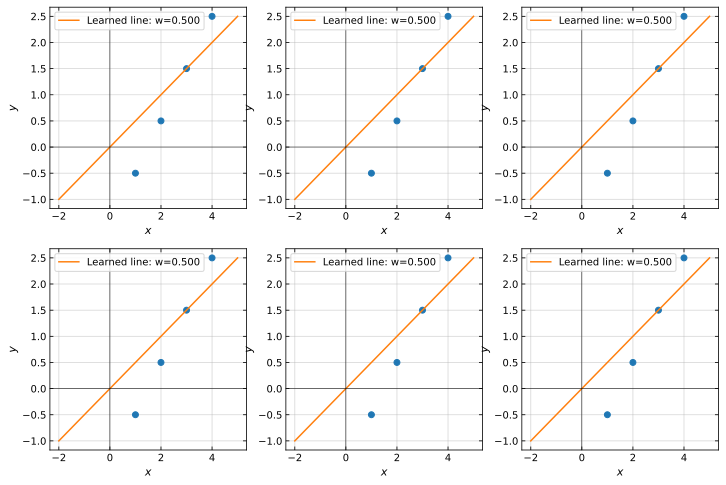

In [3]:
# Repeat the training 6 times, and plot the data along with the learned lines
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for _, ax in zip(range(6), axs.flatten()):
    # Train the model
    model = LinearModelWithoutBias()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(num_epochs):
        y_pred = model(data_x)
        loss = loss_fn(y_pred, data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot the data and the learned line
    ax.plot(data_x.numpy(), data_y.numpy(), 'o')
    x_plot = torch.linspace(-2, 5, 100)
    y_plot = model(x_plot).detach().numpy()
    ax.plot(x_plot.numpy(), y_plot, label=f'Learned line: w={model.layer.weight.item():.3f}')
    ax.set(xlabel='$x$', ylabel='$y$')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(alpha=0.5)
    ax.legend()

fig.savefig('ex48_fig1.png')

### 4.3 Two-parameter model

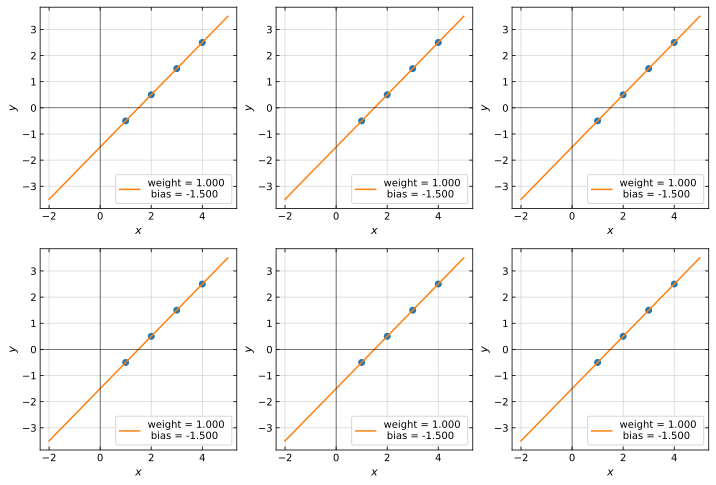

In [4]:
# Define explicit data
data_x = torch.tensor([1.0, 2.0, 3.0, 4.0], dtype=torch.float32)
data_y = torch.tensor([-0.5, 0.5, 1.5, 2.5], dtype=torch.float32)

# Define model
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Single linear layer with no bias to learn only the slope
        self.layer = torch.nn.Linear(1, 1, bias=True)

    def forward(self, x):
        x = x.view(-1, 1)
        return self.layer(x).flatten()

# Define loss function
loss_fn = torch.nn.MSELoss()


# Repeat the training 6 times, and plot the data along with the learned lines
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for _, ax in zip(range(6), axs.flatten()):
    # Train the model
    model = LinearModel()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    num_epochs = 5000
    for epoch in range(num_epochs):
        y_pred = model(data_x)
        loss = loss_fn(y_pred, data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot the data and the learned line
    ax.plot(data_x.numpy(), data_y.numpy(), 'o')
    x_plot = torch.linspace(-2, 5, 100)
    y_plot = model(x_plot).detach().numpy()
    ax.plot(x_plot.numpy(), y_plot, label=f'weight = {model.layer.weight.item():.3f} \n bias = {model.layer.bias.item():.3f}')
    ax.set(xlabel='$x$', ylabel='$y$')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(alpha=0.5)
    ax.legend()

fig.savefig('ex48_fig2.png')

### 4.4 Non-linear data: Two-parameter model

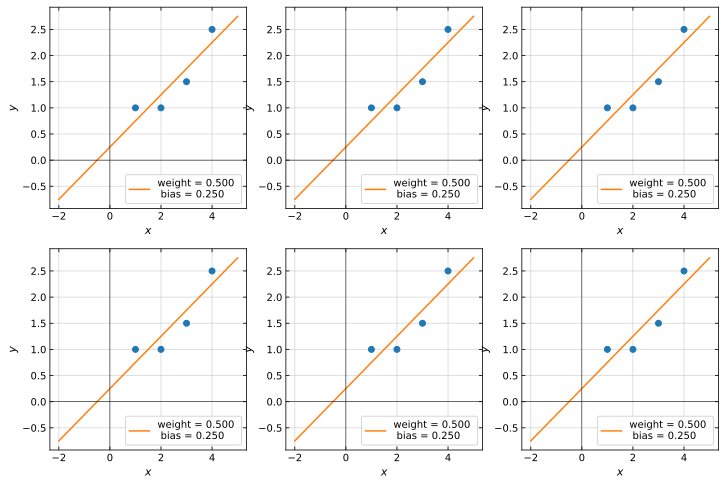

In [5]:
# Define explicit data
data_x = torch.tensor([1.0, 2.0, 3.0, 4.0], dtype=torch.float32)
data_y = torch.tensor([1.0, 1.0, 1.5, 2.5], dtype=torch.float32)

# Define loss function
loss_fn = torch.nn.MSELoss()


# Repeat the training 6 times, and plot the data along with the learned lines
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for _, ax in zip(range(6), axs.flatten()):
    # Train the model
    model = LinearModel()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    num_epochs = 5000
    for epoch in range(num_epochs):
        y_pred = model(data_x)
        loss = loss_fn(y_pred, data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot the data and the learned line
    ax.plot(data_x.numpy(), data_y.numpy(), 'o')
    x_plot = torch.linspace(-2, 5, 100)
    y_plot = model(x_plot).detach().numpy()
    ax.plot(x_plot.numpy(), y_plot, label=f'weight = {model.layer.weight.item():.3f} \n bias = {model.layer.bias.item():.3f}')
    ax.set(xlabel='$x$', ylabel='$y$')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(alpha=0.5)
    ax.legend()

fig.savefig('ex48_fig3.png')

### 4.5 Linear model + ReLU

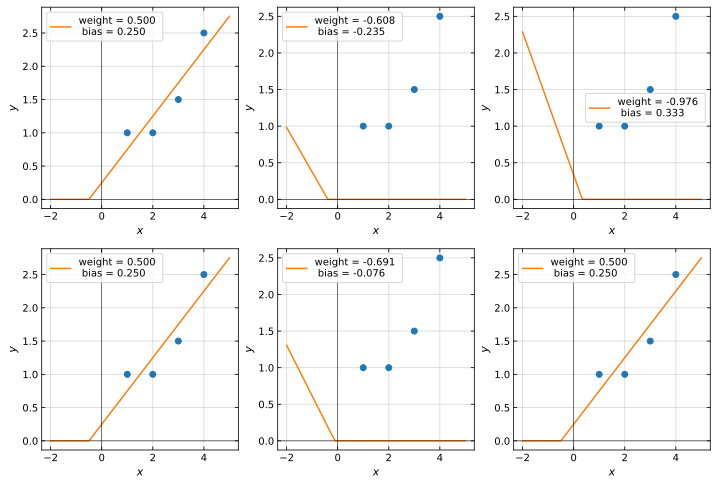

In [6]:
# Define explicit data
data_x = torch.tensor([1.0, 2.0, 3.0, 4.0], dtype=torch.float32)
data_y = torch.tensor([1.0, 1.0, 1.5, 2.5], dtype=torch.float32)

# Define model
class LinearModelWithReLU(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(1, 1, bias=True)

    def forward(self, x):
        x = x.view(-1, 1)
        x = self.layer1(x)
        x = torch.relu(x)
        return x.flatten()

# Define loss function
loss_fn = torch.nn.MSELoss()


# Repeat the training 6 times, and plot the data along with the learned lines
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for _, ax in zip(range(6), axs.flatten()):
    # Train the model
    model = LinearModelWithReLU()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    num_epochs = 1000
    for epoch in range(num_epochs):
        y_pred = model(data_x)
        loss = loss_fn(y_pred, data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot the data and the learned line
    ax.plot(data_x.numpy(), data_y.numpy(), 'o')
    x_plot = torch.linspace(-2, 5, 100)
    y_plot = model(x_plot).detach().numpy()
    ax.plot(x_plot.numpy(), y_plot, label=f'weight = {model.layer1.weight.item():.3f} \n bias = {model.layer1.bias.item():.3f}')
    ax.set(xlabel='$x$', ylabel='$y$')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(alpha=0.5)
    ax.legend()

fig.savefig('ex48_fig4.png')

### 4.6 (Linear model + ReLU) $\times$ 2

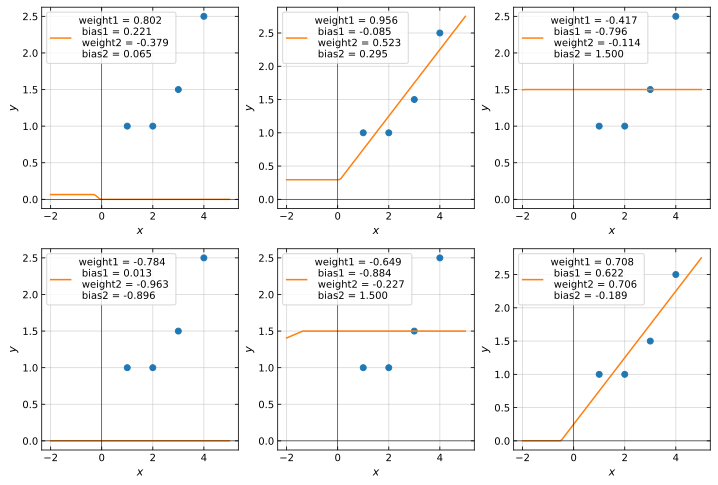

In [7]:
# Define explicit data
data_x = torch.tensor([1.0, 2.0, 3.0, 4.0], dtype=torch.float32)
data_y = torch.tensor([1.0, 1.0, 1.5, 2.5], dtype=torch.float32)

# Define model
class LinearModelWith2ReLU(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(1, 1, bias=True)
        self.layer2 = torch.nn.Linear(1, 1, bias=True)

    def forward(self, x):
        x = x.view(-1, 1)
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        x = torch.relu(x)
        return x.flatten()

# Define loss function
loss_fn = torch.nn.MSELoss()


# Repeat the training 6 times, and plot the data along with the learned lines
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for _, ax in zip(range(6), axs.flatten()):
    # Train the model
    model = LinearModelWith2ReLU()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    num_epochs = 1000
    for epoch in range(num_epochs):
        y_pred = model(data_x)
        loss = loss_fn(y_pred, data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot the data and the learned line
    ax.plot(data_x.numpy(), data_y.numpy(), 'o')
    x_plot = torch.linspace(-2, 5, 100)
    y_plot = model(x_plot).detach().numpy()
    ax.plot(x_plot.numpy(), y_plot, label=f'weight1 = {model.layer1.weight.item():.3f} \n bias1 = {model.layer1.bias.item():.3f} \n weight2 = {model.layer2.weight.item():.3f} \n bias2 = {model.layer2.bias.item():.3f}')
    ax.set(xlabel='$x$', ylabel='$y$')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(alpha=0.5)
    ax.legend()

fig.savefig('ex48_fig5.png')

### 4.7 Linear model + ReLU + Linear model

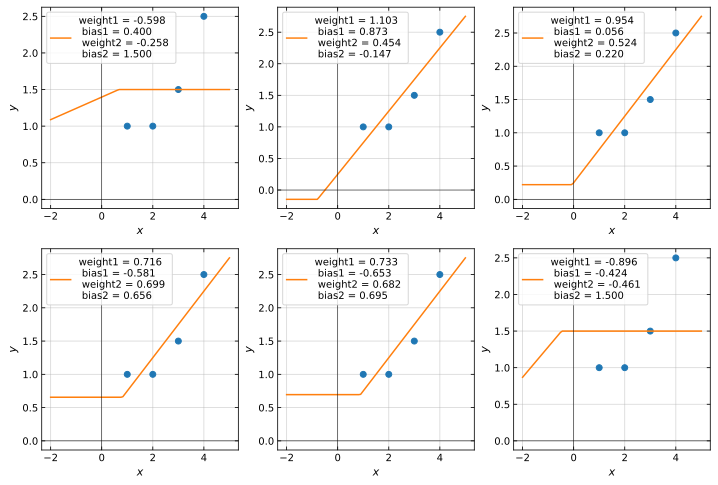

In [8]:
# Define explicit data
data_x = torch.tensor([1.0, 2.0, 3.0, 4.0], dtype=torch.float32)
data_y = torch.tensor([1.0, 1.0, 1.5, 2.5], dtype=torch.float32)

# Define model
class LinearReluLinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(1, 1, bias=True)
        self.layer2 = torch.nn.Linear(1, 1, bias=True)

    def forward(self, x):
        x = x.view(-1, 1)
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        return x.flatten()

# Define loss function
loss_fn = torch.nn.MSELoss()


# Repeat the training 6 times, and plot the data along with the learned lines
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for _, ax in zip(range(6), axs.flatten()):
    # Train the model
    model = LinearReluLinearModel()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    num_epochs = 1000
    for epoch in range(num_epochs):
        y_pred = model(data_x)
        loss = loss_fn(y_pred, data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot the data and the learned line
    ax.plot(data_x.numpy(), data_y.numpy(), 'o')
    x_plot = torch.linspace(-2, 5, 100)
    y_plot = model(x_plot).detach().numpy()
    ax.plot(x_plot.numpy(), y_plot, label=f'weight1 = {model.layer1.weight.item():.3f} \n bias1 = {model.layer1.bias.item():.3f} \n weight2 = {model.layer2.weight.item():.3f} \n bias2 = {model.layer2.bias.item():.3f}')
    ax.set(xlabel='$x$', ylabel='$y$')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(alpha=0.5)
    ax.legend()

fig.savefig('ex48_fig6.png')

### Eight linear models + ReLU + Eight linear models

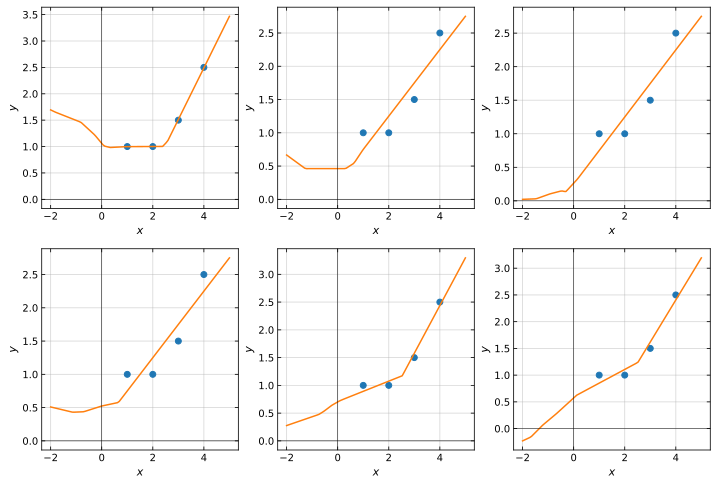

In [9]:
# Define explicit data
data_x = torch.tensor([1.0, 2.0, 3.0, 4.0], dtype=torch.float32)
data_y = torch.tensor([1.0, 1.0, 1.5, 2.5], dtype=torch.float32)

# Define model
class LinearReluLinear8Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(1, 8, bias=True)
        self.layer2 = torch.nn.Linear(8, 1, bias=True)

    def forward(self, x):
        x = x.view(-1, 1)
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        return x.flatten()

# Define loss function
loss_fn = torch.nn.MSELoss()


# Repeat the training 6 times, and plot the data along with the learned lines
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for _, ax in zip(range(6), axs.flatten()):
    # Train the model
    model = LinearReluLinear8Model()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    num_epochs = 1000
    for epoch in range(num_epochs):
        y_pred = model(data_x)
        loss = loss_fn(y_pred, data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Plot the data and the learned line
    ax.plot(data_x.numpy(), data_y.numpy(), 'o')
    x_plot = torch.linspace(-2, 5, 100)
    y_plot = model(x_plot).detach().numpy()
    ax.plot(x_plot.numpy(), y_plot)
    ax.set(xlabel='$x$', ylabel='$y$')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(alpha=0.5)

fig.savefig('ex48_fig7.png')